In [13]:
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import check_output
from json import loads
%matplotlib inline

In [56]:
!go build -o fsbench main.go

In [57]:
def run(size=1024, page_size=4096, count=100):
    return loads(
        check_output(
            [
                "./fsbench",
                "-size",
                str(size),
                "-pageSize",
                str(page_size),
                "-count",
                str(count),
            ]
        )
    )

In [58]:
run()

CalledProcessError: Command '['./fsbench', '-size', '32', '-pageSize', '4096', '-count', '100']' returned non-zero exit status 1.

In [46]:
test_runs = [run() for _ in range(1000)]

In [47]:
test_runs_df = pd.DataFrame(test_runs)

In [48]:
test_runs_df

,Success,Size,PageSize,Count,TotalTime,TotalHeap
0,True,4194304,4096,100,1844715,1031544
1,True,4194304,4096,100,1395855,1031224
2,True,4194304,4096,100,1133265,1030264
3,True,4194304,4096,100,1281954,1032152
4,True,4194304,4096,100,1036506,1029704
...,...,...,...,...,...,...
995,True,4194304,4096,100,1016968,1031000
996,True,4194304,4096,100,1016994,1029560
997,True,4194304,4096,100,1008565,1030904
998,True,4194304,4096,100,1042356,1031320


<Axes: xlabel='index'>

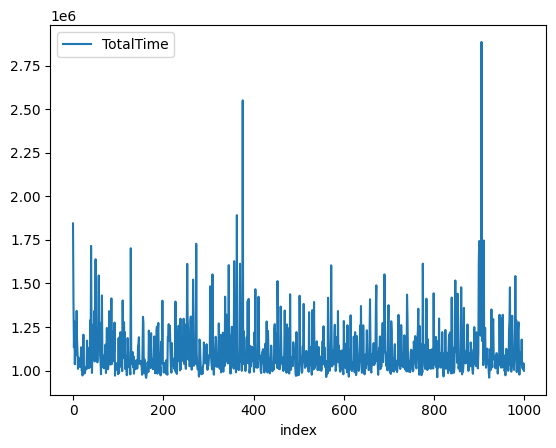

In [49]:
test_runs_df.reset_index().plot(x="index", y="TotalTime")

In [55]:
page_size_runs = [run(page_size=i, size=1024, count=10) for i in range(128, 8192, 8)]

CalledProcessError: Command '['./fsbench', '-size', '1024', '-pageSize', '8', '-count', '10']' returned non-zero exit status 1.

In [54]:
page_size_runs

[1024,
 2048,
 3072,
 4096,
 5120,
 6144,
 7168,
 8192,
 9216,
 10240,
 11264,
 12288,
 13312,
 14336,
 15360,
 16384,
 17408,
 18432,
 19456,
 20480,
 21504,
 22528,
 23552,
 24576,
 25600,
 26624,
 27648,
 28672,
 29696,
 30720,
 31744,
 32768,
 33792,
 34816,
 35840,
 36864,
 37888,
 38912,
 39936,
 40960,
 41984,
 43008,
 44032,
 45056,
 46080,
 47104,
 48128,
 49152,
 50176,
 51200,
 52224,
 53248,
 54272,
 55296,
 56320,
 57344,
 58368,
 59392,
 60416,
 61440,
 62464,
 63488,
 64512,
 65536,
 66560,
 67584,
 68608,
 69632,
 70656,
 71680,
 72704,
 73728,
 74752,
 75776,
 76800,
 77824,
 78848,
 79872,
 80896,
 81920,
 82944,
 83968,
 84992,
 86016,
 87040,
 88064,
 89088,
 90112,
 91136,
 92160,
 93184,
 94208,
 95232,
 96256,
 97280,
 98304,
 99328,
 100352,
 101376,
 102400,
 103424,
 104448,
 105472,
 106496,
 107520,
 108544,
 109568,
 110592,
 111616,
 112640,
 113664,
 114688,
 115712,
 116736,
 117760,
 118784,
 119808,
 120832,
 121856,
 122880,
 123904,
 124928,
 125952,